## libraries

In [8]:
## libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# inladen data

In [4]:
df = pd.read_csv("data/competition-train(1).csv", skiprows=30)

In [5]:
display(df)

,idx,patiënt-id,sex,leeftijd,lengte,gewicht,bovendruk,onderdruk,tv-per-dag,beweging-per-week,slaapscore,maandinkomen,hypertensie,bmi,opleidingsniveau,astigmatisme,MHS
0,978,BFV2-0979,M,30.0,184,64,114.0,75,3,8.0,82.559178,4024.0,False,18.903592,HAVO/VWO/MBO2,True,False
1,806,BFV2-0807,M,48.0,169,82,127.0,82,5,10.0,58.244951,3546.0,False,28.710479,HAVO/VWO/MBO2,True,True
2,1337,BFV2-1338,M,28.0,175,58,110.0,83,2,9.0,20.000000,3744.0,False,18.938776,HAVO/VWO/MBO2,True,False
3,606,BFV2-0607,M,43.0,171,83,140.0,77,5,9.0,72.707249,3579.0,True,28.384802,Basisonderwijs/MBO1,True,True
4,701,BFV2-0702,V,48.0,175,79,125.0,77,4,6.0,53.912941,3197.0,False,25.795918,Basisonderwijs/MBO1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,92,BFV2-0093,V,32.0,160,80,122.0,90,6,9.0,59.590712,3997.0,True,31.250000,HAVO/VWO/MBO2,True,True
956,540,BFV2-0541,M,29.0,163,79,80.0,74,6,8.0,64.762643,NaN,False,29.733900,HAVO/VWO/MBO2,True,False
957,229,BFV2-0230,V,40.0,183,74,117.0,82,4,6.0,91.885641,4131.0,False,22.096808,HBO/WO,False,True
958,383,BFV2-0384,V,35.0,164,80,128.0,81,5,10.0,63.835921,3363.0,False,29.744200,HAVO/VWO/MBO2,False,False


In [7]:
df.columns.to_list()

['idx',
 'patiënt-id',
 'sex',
 'leeftijd',
 'lengte',
 'gewicht',
 'bovendruk',
 'onderdruk',
 'tv-per-dag',
 'beweging-per-week',
 'slaapscore',
 'maandinkomen',
 'hypertensie',
 'bmi',
 'opleidingsniveau',
 'astigmatisme',
 'MHS']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                960 non-null    int64  
 1   patiënt-id         960 non-null    object 
 2   sex                960 non-null    object 
 3   leeftijd           949 non-null    float64
 4   lengte             960 non-null    int64  
 5   gewicht            960 non-null    int64  
 6   bovendruk          912 non-null    float64
 7   onderdruk          960 non-null    int64  
 8   tv-per-dag         960 non-null    int64  
 9   beweging-per-week  938 non-null    float64
 10  slaapscore         960 non-null    float64
 11  maandinkomen       942 non-null    float64
 12  hypertensie        960 non-null    bool   
 13  bmi                947 non-null    float64
 14  opleidingsniveau   960 non-null    object 
 15  astigmatisme       960 non-null    bool   
 16  MHS                960 non

In [10]:
df.describe()

,idx,leeftijd,lengte,gewicht,bovendruk,onderdruk,tv-per-dag,beweging-per-week,slaapscore,maandinkomen,bmi
count,960.000000,949.000000,960.000000,960.000000,912.000000,960.000000,960.000000,938.000000,960.000000,942.000000,947.000000
mean,739.593750,37.800843,173.579167,74.155208,118.980263,78.883333,3.906250,7.351812,67.970633,3982.304671,24.303876
std,428.617463,14.009090,8.498297,9.533754,11.702573,5.757792,1.122136,1.873793,14.614785,359.920970,4.112793
min,0.000000,-8.000000,143.000000,55.000000,80.000000,58.000000,0.000000,2.000000,20.000000,2800.000000,8.000000
25%,374.750000,32.000000,169.000000,68.000000,112.000000,76.000000,3.000000,6.000000,62.414559,3740.250000,21.799445
50%,724.500000,39.000000,174.000000,74.000000,119.000000,79.000000,4.000000,7.000000,69.774242,3988.000000,24.391059
75%,1103.750000,47.000000,179.000000,81.000000,126.000000,83.000000,5.000000,9.000000,76.686194,4235.750000,27.084159
max,1499.000000,65.000000,196.000000,100.000000,148.000000,90.000000,7.000000,10.000000,100.000000,5050.000000,37.807183


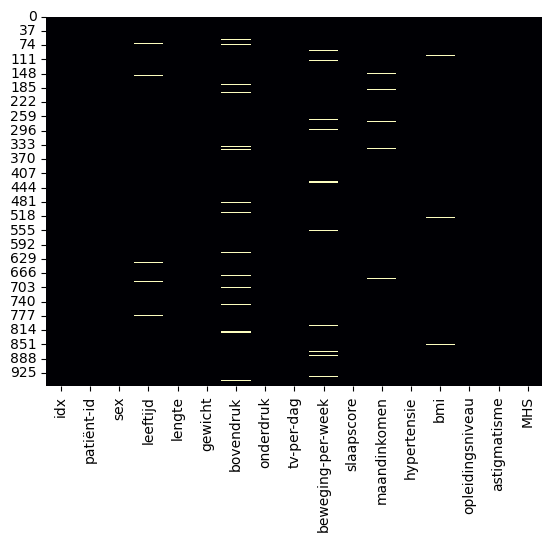

In [11]:
sns.heatmap(df.isnull(),cmap="magma",cbar=False);

picture above missng values:
- leeftijd
- bovendruk
- beweging p/week
- maandinkomen
- bmi

In [13]:
filtered_df = df[df[df.columns.to_list()].notnull().all(1)]

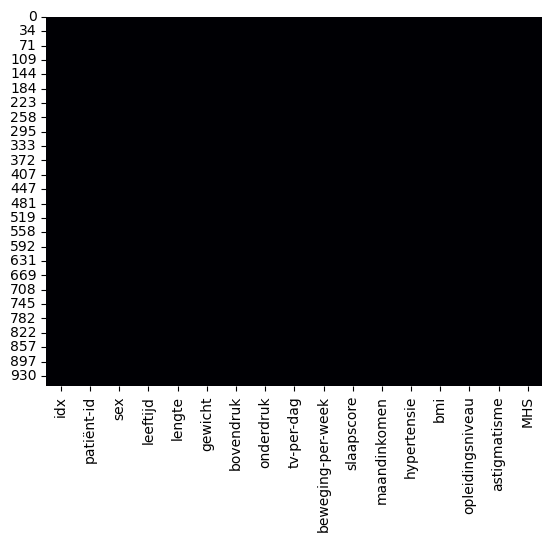

In [14]:
sns.heatmap(filtered_df.isnull(),cmap="magma",cbar=False);

all na's rows removed

# Numeric features
numeric_cols = filtered_df.select_dtypes(include=np.number).columns.tolist()

# Categorical features (low cardinality)
categorical_cols = filtered_df.select_dtypes(include='object').nunique()
categorical_cols = categorical_cols[categorical_cols < 20].index.tolist()

# Histograms for numeric features
filtered_df[numeric_cols].hist(bins=30, figsize=(14, 10), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots for numeric features
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=filtered_df[col])
    plt.title(f"📦 Boxplot of {col}")
    plt.show()
